In [1]:
import dianna
import tensorflow as tf
import numpy as np
from pathlib import Path
%matplotlib inline
from matplotlib import pyplot as plt

2022-09-07 07:23:55.408291: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-07 07:23:55.408328: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
loaded_model = tf.keras.models.load_model('pre-trained')

2022-09-06 13:49:04.779473: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-06 13:49:04.779503: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-06 13:49:04.779520: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyternoteboo): /proc/driver/nvidia/version does not exist
2022-09-06 13:49:04.779797: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
loaded_model

In [13]:
savedmodel_dir = 'pre-trained'
onnx_savedmodel = 'pre-trained.onnx'
!python3 -m tf2onnx.convert --saved-model {savedmodel_dir} --output {onnx_savedmodel} --signature_def serving_default --tag serve

2022-09-06 13:58:59.440444: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-06 13:58:59.440485: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/usr/lib/python3.8/runpy.py:127: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2022-09-06 13:59:01.065073: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-06 13:59:01.065102: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-06 13:59:01.065125: 

In [2]:
scratchdir = Path('/scratch/')
experiment_name = 'trial2_ensmean'
train_inputs = np.load(scratchdir / f'{experiment_name}.training_inputs.npy')
train_target = np.load(scratchdir / f'{experiment_name}.training_terciles.npy')

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/trial2_ensmean.training_inputs.npy'

In [42]:
train_inputs.shape

(1060, 27, 27, 3)

In [43]:
train_target.shape

(1060, 3)

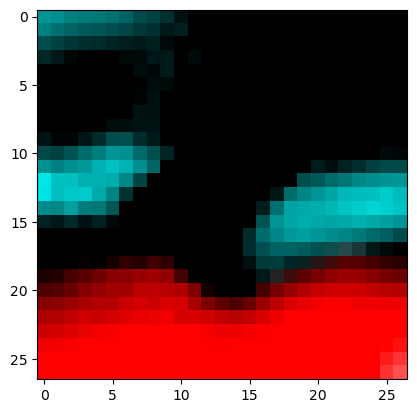

In [27]:
plt.imshow(train_inputs[0])

In [49]:
train_inputs[0][:,:,0].shape

(27, 27)

In [ ]:
fig, axs = plt.subplots(2, 2)
cmaps = ['Blues', 'Oranges', 'Purples']
for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1),
                            cmap=cmaps[col])
        fig.colorbar(pcm, ax=ax)
plt.show()

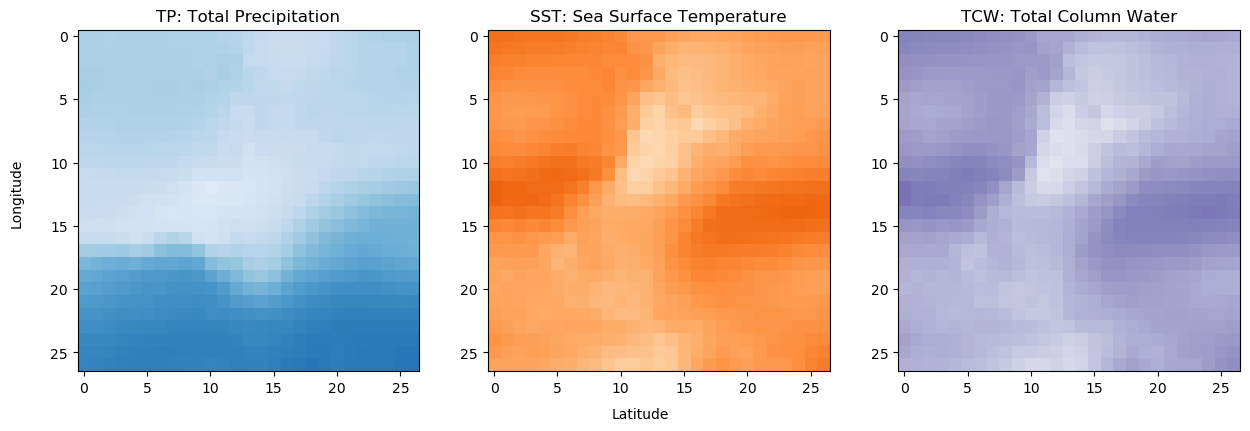

In [79]:
sample = train_inputs[0]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 15))

fig.text(0.5, 0.35, 'Latitude', ha='center')
fig.text(0.08, 0.5, 'Longitude', va='center', rotation='vertical')

#fig.suptitle('Vertically stacked subplots')
ax1.imshow(sample[:,:,0], cmap='Blues', vmin = -3, vmax = 3)
ax1.title.set_text('TP: Total Precipitation')

ax2.imshow(sample[:,:,1], cmap='Oranges', vmin = -3, vmax = 3)
ax2.title.set_text('SST: Sea Surface Temperature')

ax3.imshow(sample[:,:,2], cmap='Purples', vmin = -3, vmax = 3)
ax3.title.set_text('TCW: Total Column Water')